In [23]:
import warnings
warnings.filterwarnings("ignore")

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [66]:
# Read the data from the CSV file
data = pd.read_csv('Wholesale customers data.csv')
column_names = data.columns.tolist()
print(column_names)

['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']


In [67]:
# Perform data normalization
scaler = StandardScaler()
X = data[data.columns[::]]
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Minimum number of samples in a cluster**

In [74]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Define the range of epsilon and min_samples values to evaluate
epsilon_values = np.linspace(0.1, 2.0, num=20)
min_samples_values = range(2, 11)

best_silhouette_score = -1
best_epsilon = -1
best_min_samples = -1

for epsilon in epsilon_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)

        # Check if multiple clusters are identified
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            silhouette_avg = silhouette_score(X_scaled, labels)
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_epsilon = epsilon
                best_min_samples = min_samples

# Print the best epsilon, min_samples, and corresponding silhouette score
print("Best epsilon:", best_epsilon)
print("Best min_samples:", best_min_samples)
print("Best Silhouette Score:", best_silhouette_score)


Best epsilon: 1.7
Best min_samples: 3
Best Silhouette Score: 0.3655323863951086


Number of clusters: 2
Silhouette Score: 0.35371620993298925


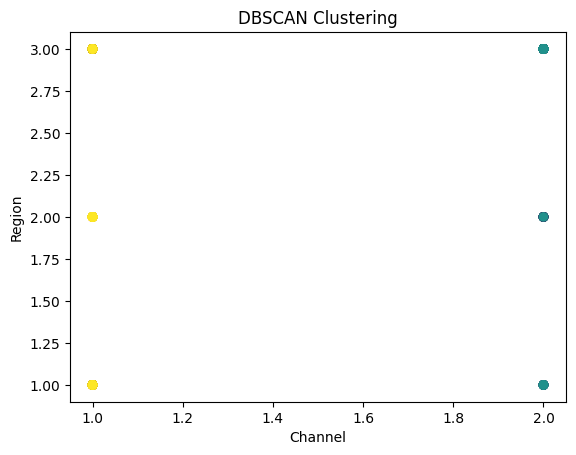

In [77]:
# Create the DBSCAN clustering model
epsilon = 1.7 # Distance threshold
min_samples = 9 # Minimum number of samples in a cluster
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

# Fit the model on the normalized data
dbscan.fit(X_scaled)

# Get the cluster labels for each data point (-1 represents noise)
labels = dbscan.labels_

# Get the number of clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters)

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

# Plot a graph for analysis (example with two features)
feature1 = 'Channel' # Name of the first feature column
feature2 = 'Region' # Name of the second feature column

# Extract the values for plotting
x1 = X[feature1]
x2 = X[feature2]

# Plot the data points with their cluster labels
plt.scatter(x1, x2, c=labels)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("DBSCAN Clustering")
plt.show()



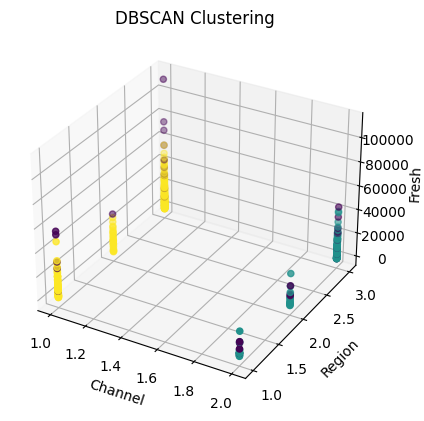

In [78]:
# Plot a graph for analysis (example with three features)
feature1 = 'Channel' # Name of the first feature column
feature2 = 'Region' # Name of the second feature column
feature3 = 'Fresh' # Name of the third feature column

# Extract the values for plotting
x1 = X[feature1]
x2 = X[feature2]
x3 = X[feature3]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points with their cluster labels
ax.scatter(x1, x2, x3, c=labels)

# Set labels for each axis
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(feature3)

# Set title for the plot
plt.title("DBSCAN Clustering")

# Show the plot
plt.show()
